In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path1="/content/drive/My Drive/Insurance Fraud - TRAIN-3000.csv"
path2="/content/drive/My Drive/Insurance Fraud -TEST-12900.csv"

In [4]:
train_df=pd.read_csv(path1)
test_df=pd.read_csv(path2)

In [5]:
train_df.head()

,MONTH,WEEKOFMONTH,DAYOFWEEK,MAKE,ACCIDENTAREA,DAYOFWEEKCLAIMED,MONTHCLAIMED,WEEKOFMONTHCLAIMED,SEX,MARITALSTATUS,...,AGEOFPOLICYHOLDER,POLICEREPORTFILED,WITNESSPRESENT,AGENTTYPE,NUMBEROFSUPPLIMENTS,ADDRESSCHANGE_CLAIM,NUMBEROFCARS,YEAR,BASEPOLICY,FRAUDFOUND
0,Jul,3,Sunday,Honda,Rural,Wednesday,Jan,4,Male,Married,...,26_to_30,No,No,External,3_to_5,no_change,1-vehicle,1994,Collision,Yes
1,Nov,5,Monday,Mazda,Urban,Wednesday,Dec,1,Male,Single,...,over_65,No,No,External,none,no_change,1-vehicle,1994,All_Perils,Yes
2,Jan,1,Monday,Pontiac,Urban,Wednesday,Jan,1,Male,Married,...,41_to_50,No,No,External,none,under_6_months,1-vehicle,1994,All_Perils,Yes
3,Dec,1,Monday,Toyota,Rural,Tuesday,May,3,Male,Married,...,36_to_40,No,No,External,more_than_5,under_6_months,2-vehicles,1994,All_Perils,Yes
4,Dec,5,Wednesday,Pontiac,Urban,Wednesday,Jan,1,Male,Single,...,36_to_40,No,No,External,more_than_5,no_change,1-vehicle,1994,Collision,Yes


In [6]:
test_df.head()

,MONTH,WEEKOFMONTH,DAYOFWEEK,MAKE,ACCIDENTAREA,DAYOFWEEKCLAIMED,MONTHCLAIMED,WEEKOFMONTHCLAIMED,SEX,MARITALSTATUS,...,AGEOFPOLICYHOLDER,POLICEREPORTFILED,WITNESSPRESENT,AGENTTYPE,NUMBEROFSUPPLIMENTS,ADDRESSCHANGE_CLAIM,NUMBEROFCARS,YEAR,BASEPOLICY,FRAUDFOUND
0,Jul,3,Sunday,Honda,Rural,Wednesday,Jan,4,Male,Married,...,26_to_30,No,No,External,3_to_5,no_change,1-vehicle,1994,Collision,Yes
1,Nov,5,Monday,Mazda,Urban,Wednesday,Dec,1,Male,Single,...,over_65,No,No,External,none,no_change,1-vehicle,1994,All_Perils,Yes
2,Jan,1,Monday,Pontiac,Urban,Wednesday,Jan,1,Male,Married,...,41_to_50,No,No,External,none,under_6_months,1-vehicle,1994,All_Perils,Yes
3,Dec,1,Monday,Toyota,Rural,Tuesday,May,3,Male,Married,...,36_to_40,No,No,External,more_than_5,under_6_months,2-vehicles,1994,All_Perils,Yes
4,Dec,5,Wednesday,Pontiac,Urban,Wednesday,Jan,1,Male,Single,...,36_to_40,No,No,External,more_than_5,no_change,1-vehicle,1994,Collision,Yes


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   MONTH                 2999 non-null   object
 1   WEEKOFMONTH           2999 non-null   int64 
 2   DAYOFWEEK             2999 non-null   object
 3   MAKE                  2999 non-null   object
 4   ACCIDENTAREA          2999 non-null   object
 5   DAYOFWEEKCLAIMED      2999 non-null   object
 6   MONTHCLAIMED          2999 non-null   object
 7   WEEKOFMONTHCLAIMED    2999 non-null   int64 
 8   SEX                   2999 non-null   object
 9   MARITALSTATUS         2999 non-null   object
 10  AGE                   2999 non-null   int64 
 11  FAULT                 2999 non-null   object
 12  POLICYTYPE            2999 non-null   object
 13  VEHICLECATEGORY       2999 non-null   object
 14  VEHICLEPRICE          2999 non-null   object
 15  REPNUMBER             2999 non-null   

In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12918 entries, 0 to 12917
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   MONTH                 12918 non-null  object
 1   WEEKOFMONTH           12918 non-null  int64 
 2   DAYOFWEEK             12918 non-null  object
 3   MAKE                  12918 non-null  object
 4   ACCIDENTAREA          12918 non-null  object
 5   DAYOFWEEKCLAIMED      12918 non-null  object
 6   MONTHCLAIMED          12918 non-null  object
 7   WEEKOFMONTHCLAIMED    12918 non-null  int64 
 8   SEX                   12918 non-null  object
 9   MARITALSTATUS         12918 non-null  object
 10  AGE                   12918 non-null  int64 
 11  FAULT                 12918 non-null  object
 12  POLICYTYPE            12918 non-null  object
 13  VEHICLECATEGORY       12918 non-null  object
 14  VEHICLEPRICE          12918 non-null  object
 15  REPNUMBER             12918 non-null

In [9]:
train_df.describe()

,WEEKOFMONTH,WEEKOFMONTHCLAIMED,AGE,REPNUMBER,DEDUCTIBLE,DRIVERRATING,YEAR
count,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000
mean,2.781260,2.671224,40.055352,8.511837,407.302434,2.496832,1995.114038
std,1.286055,1.261614,13.497026,4.601437,41.847258,1.118365,0.606007
min,1.000000,1.000000,0.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,4.000000,400.000000,1.000000,1995.000000
50%,3.000000,3.000000,38.000000,9.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,49.000000,12.000000,400.000000,3.000000,1995.000000
max,5.000000,5.000000,80.000000,16.000000,700.000000,4.000000,1996.000000


In [10]:
test_df.describe()

,WEEKOFMONTH,WEEKOFMONTHCLAIMED,AGE,REPNUMBER,DEDUCTIBLE,DRIVERRATING,YEAR
count,12918.000000,12918.000000,12918.000000,12918.000000,12918.000000,12918.000000,12918.000000
mean,2.786190,2.693296,39.915854,8.480183,407.586314,2.488853,1994.999458
std,1.289048,1.259564,13.432421,4.602126,43.672599,1.118991,0.786046
min,1.000000,1.000000,0.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,16.000000,700.000000,4.000000,1996.000000


In [11]:
train_df.isnull().sum()

,0
MONTH,0
WEEKOFMONTH,0
DAYOFWEEK,0
MAKE,0
ACCIDENTAREA,0
DAYOFWEEKCLAIMED,0
MONTHCLAIMED,0
WEEKOFMONTHCLAIMED,0
SEX,0
MARITALSTATUS,0


In [12]:
test_df.isnull().sum()

,0
MONTH,0
WEEKOFMONTH,0
DAYOFWEEK,0
MAKE,0
ACCIDENTAREA,0
DAYOFWEEKCLAIMED,0
MONTHCLAIMED,0
WEEKOFMONTHCLAIMED,0
SEX,0
MARITALSTATUS,0


In [13]:
label_encoder = LabelEncoder()
train_df['FRAUDFOUND'] = label_encoder.fit_transform(train_df['FRAUDFOUND'])
test_df['FRAUDFOUND'] = label_encoder.transform(test_df['FRAUDFOUND'])

# Separating features and target variable
X_train = train_df.drop(columns=['FRAUDFOUND'])
y_train = train_df['FRAUDFOUND']
X_test = test_df.drop(columns=['FRAUDFOUND'])
y_test = test_df['FRAUDFOUND']

# Encoding categorical variables using one-hot encoding
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

# Align train and test data to have the same columns
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

# Handling missing values (e.g., filling NaNs with median for numerical columns)
X_train_encoded.fillna(X_train_encoded.median(), inplace=True)
X_test_encoded.fillna(X_test_encoded.median(), inplace=True)

# Output the shapes of processed data
print("Training data shape:", X_train_encoded.shape)
print("Test data shape:", X_test_encoded.shape)


Training data shape: (2999, 115)
Test data shape: (12918, 115)


In [14]:
 X_train_encoded.head()

,WEEKOFMONTH,WEEKOFMONTHCLAIMED,AGE,REPNUMBER,DEDUCTIBLE,DRIVERRATING,YEAR,MONTH_Aug,MONTH_Dec,MONTH_Feb,...,NUMBEROFSUPPLIMENTS_none,ADDRESSCHANGE_CLAIM_2_to_3_years,ADDRESSCHANGE_CLAIM_4_to_8_years,ADDRESSCHANGE_CLAIM_no_change,ADDRESSCHANGE_CLAIM_under_6_months,NUMBEROFCARS_2-vehicles,NUMBEROFCARS_3_to_4,NUMBEROFCARS_5_to_8,BASEPOLICY_Collision,BASEPOLICY_Liability
0,3,4,21,4,400,4,1994,False,False,False,...,False,False,False,True,False,False,False,False,True,False
1,5,1,68,9,400,3,1994,False,False,False,...,True,False,False,True,False,False,False,False,False,False
2,1,1,50,8,400,2,1994,False,False,False,...,True,False,False,False,True,False,False,False,False,False
3,1,3,39,1,400,3,1994,False,True,False,...,False,False,False,False,True,True,False,False,False,False
4,5,1,43,1,400,4,1994,False,True,False,...,False,False,False,True,False,False,False,False,True,False


In [15]:
X_test_encoded.head()

,WEEKOFMONTH,WEEKOFMONTHCLAIMED,AGE,REPNUMBER,DEDUCTIBLE,DRIVERRATING,YEAR,MONTH_Aug,MONTH_Dec,MONTH_Feb,...,NUMBEROFSUPPLIMENTS_none,ADDRESSCHANGE_CLAIM_2_to_3_years,ADDRESSCHANGE_CLAIM_4_to_8_years,ADDRESSCHANGE_CLAIM_no_change,ADDRESSCHANGE_CLAIM_under_6_months,NUMBEROFCARS_2-vehicles,NUMBEROFCARS_3_to_4,NUMBEROFCARS_5_to_8,BASEPOLICY_Collision,BASEPOLICY_Liability
0,3,4,21,4,400,4,1994,False,False,False,...,False,False,False,True,False,False,False,False,True,False
1,5,1,68,9,400,3,1994,False,False,False,...,True,False,False,True,False,False,False,False,False,False
2,1,1,50,8,400,2,1994,False,False,False,...,True,False,False,False,True,False,False,False,False,False
3,1,3,39,1,400,3,1994,False,True,False,...,False,False,False,False,True,True,False,False,False,False
4,5,1,43,1,400,4,1994,False,True,False,...,False,False,False,True,False,False,False,False,True,False


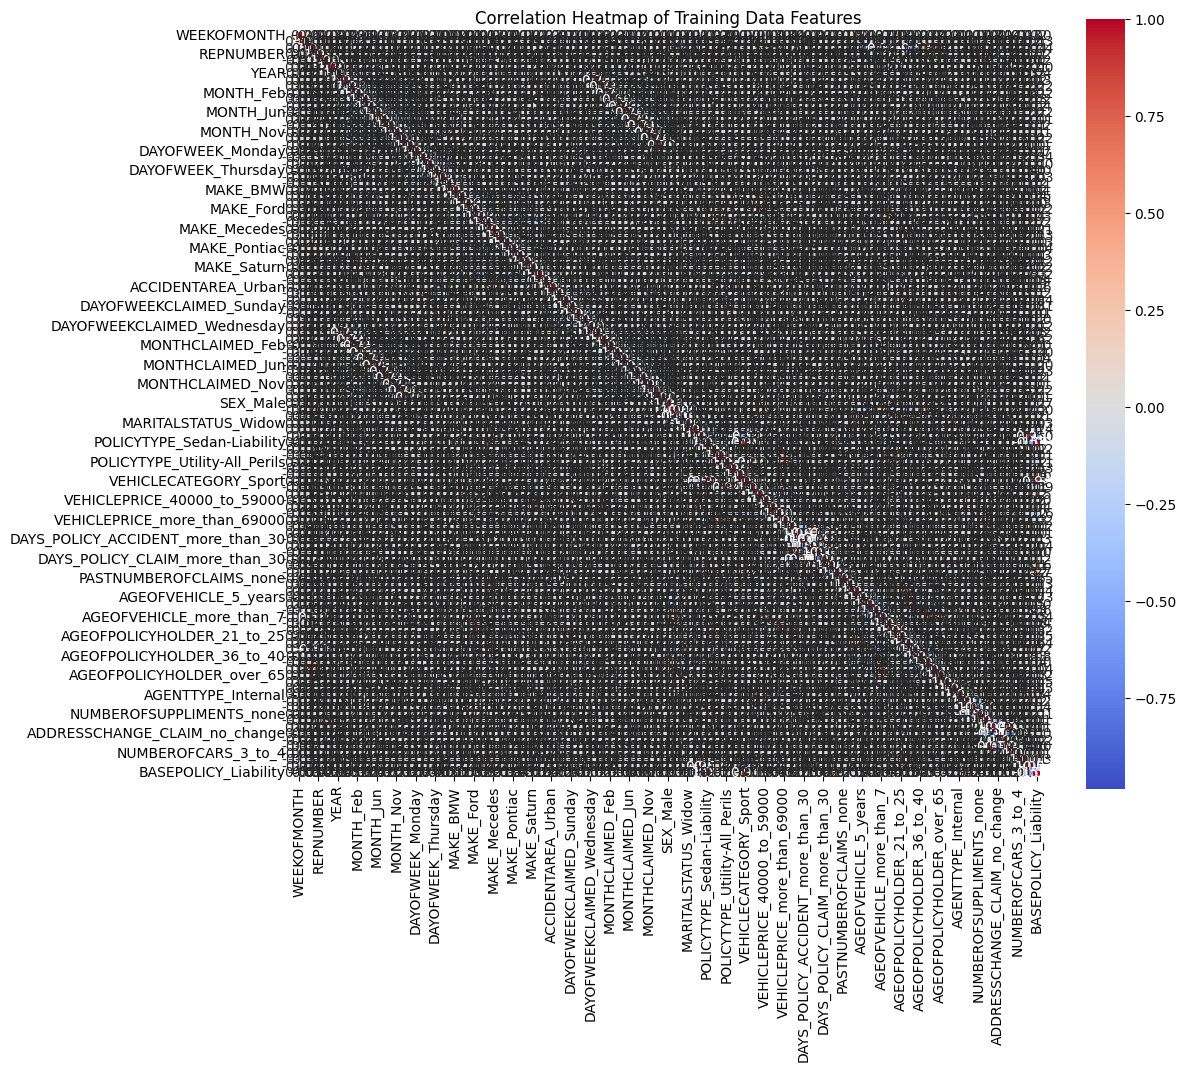

In [16]:
import seaborn as sns
correlation_matrix = X_train_encoded.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title("Correlation Heatmap of Training Data Features")
plt.show()

In [17]:
dt_param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50,60,75,80,90,100],
}

rf_param_grid = {
    'max_depth': [None, 10, 20, 30, 40,55,60,75,80,90,100],

}

dt_classifier = DecisionTreeClassifier(random_state=42)
rf_classifier = RandomForestClassifier(random_state=42)

print("Decision Tree Parameter Grid:", dt_param_grid)
print("Random Forest Parameter Grid:", rf_param_grid)

Decision Tree Parameter Grid: {'max_depth': [None, 10, 20, 30, 40, 50, 60, 75, 80, 90, 100]}
Random Forest Parameter Grid: {'max_depth': [None, 10, 20, 30, 40, 55, 60, 75, 80, 90, 100]}


In [18]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score
from skopt import BayesSearchCV  # Bayesian search

dt_random_search = RandomizedSearchCV(dt_classifier, dt_param_grid, n_iter=11, cv=5, scoring='accuracy', random_state=42)
dt_grid_search = GridSearchCV(dt_classifier, dt_param_grid, cv=5, scoring='accuracy')
dt_bayes_search = BayesSearchCV(dt_classifier, dt_param_grid, n_iter=11, cv=5, scoring='accuracy', random_state=42)

# Fit the Randomized Search as a first step example for Decision Tree
dt_random_search.fit(X_train_encoded, y_train)
dt_grid_search.fit(X_train_encoded, y_train)
dt_bayes_search.fit(X_train_encoded, y_train)

# Output best parameters and score for the Randomized Search on Decision Tree
dt_random_best_params = dt_random_search.best_params_
dt_random_best_score = dt_random_search.best_score_

dt_grid_best_params = dt_grid_search.best_params_
dt_grid_best_score = dt_grid_search.best_score_

dt_bayes_search_best_params = dt_bayes_search.best_params_
dt_bayes_search_best_score = dt_bayes_search.best_score_

print("Decision Tree best Parameter and best score for random search: ",dt_random_best_params, dt_random_best_score)
print("Decision Tree best Parameter and best score for grid search: ",dt_grid_best_params, dt_grid_best_score)
print("Decision Tree best Parameter and best score for bayes search: ",dt_bayes_search_best_params, dt_bayes_search_best_score)

Decision Tree best Parameter and best score for random search:  {'max_depth': 10} 0.8579343350027825
Decision Tree best Parameter and best score for grid search:  {'max_depth': 10} 0.8579343350027825
Decision Tree best Parameter and best score for bayes search:  OrderedDict([('max_depth', 40)]) 0.8379287701725098


In [19]:
rf_random_search = RandomizedSearchCV(rf_classifier, rf_param_grid, n_iter=11, cv=5, scoring='accuracy', random_state=42)
rf_grid_search = GridSearchCV(rf_classifier, rf_param_grid, cv=5, scoring='accuracy')
rf_bayes_search = BayesSearchCV(rf_classifier, rf_param_grid, n_iter=11, cv=5, scoring='accuracy', random_state=42)

rf_random_search.fit(X_train_encoded, y_train)
rf_grid_search.fit(X_train_encoded, y_train)
rf_bayes_search.fit(X_train_encoded, y_train)

# Output best parameters and score for the Randomized Search on Decision Tree
rf_random_best_params = rf_random_search.best_params_
rf_random_best_score = rf_random_search.best_score_

rf_grid_best_params = rf_grid_search.best_params_
rf_grid_best_score = rf_grid_search.best_score_

rf_bayes_search_best_params = rf_bayes_search.best_params_
rf_bayes_search_best_score = rf_bayes_search.best_score_

print("Random Forest best Parameter and best score for random search: ",rf_random_best_params, rf_random_best_score)
print("Random Forest best Parameter and best score for grid search: ",rf_grid_best_params, rf_grid_best_score)
print("Random Forest best Parameter and best score for bayes search: ",rf_bayes_search_best_params, rf_bayes_search_best_score)

Random Forest best Parameter and best score for random search:  {'max_depth': 20} 0.8766265998887034
Random Forest best Parameter and best score for grid search:  {'max_depth': 20} 0.8766265998887034
Random Forest best Parameter and best score for bayes search:  OrderedDict([('max_depth', 40)]) 0.8742938230383974


In [20]:
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
}

rf_param_grid = {
    'n_estimators': [50, 100, 200, 250, 300, 350, 400, 420, 450, 500],
}

dt_classifier = DecisionTreeClassifier(random_state=42)
rf_classifier = RandomForestClassifier(random_state=42)

print("Decision Tree Parameter Grid:", dt_param_grid)
print("Random Forest Parameter Grid:", rf_param_grid)


Decision Tree Parameter Grid: {'criterion': ['gini', 'entropy']}
Random Forest Parameter Grid: {'n_estimators': [50, 100, 200, 250, 300, 350, 400, 420, 450, 500]}


In [21]:
dt_random_search = RandomizedSearchCV(dt_classifier, dt_param_grid, n_iter=2, cv=5, scoring='accuracy', random_state=42)
dt_grid_search = GridSearchCV(dt_classifier, dt_param_grid, cv=5, scoring='accuracy')
dt_bayes_search = BayesSearchCV(dt_classifier, dt_param_grid, n_iter=2, cv=5, scoring='accuracy', random_state=42)

# Fit the Randomized Search as a first step example for Decision Tree
dt_random_search.fit(X_train_encoded, y_train)
dt_grid_search.fit(X_train_encoded, y_train)
dt_bayes_search.fit(X_train_encoded, y_train)

# Output best parameters and score for the Randomized Search on Decision Tree
dt_random_best_params = dt_random_search.best_params_
dt_random_best_score = dt_random_search.best_score_

dt_grid_best_params = dt_grid_search.best_params_
dt_grid_best_score = dt_grid_search.best_score_

dt_bayes_search_best_params = dt_bayes_search.best_params_
dt_bayes_search_best_score = dt_bayes_search.best_score_

print("Decision Tree best Parameter and best score for random search: ",dt_random_best_params, dt_random_best_score)
print("Decision Tree best Parameter and best score for grid search: ",dt_grid_best_params, dt_grid_best_score)
print("Decision Tree best Parameter and best score for bayes search: ",dt_bayes_search_best_params, dt_bayes_search_best_score)

Decision Tree best Parameter and best score for random search:  {'criterion': 'gini'} 0.8379287701725098
Decision Tree best Parameter and best score for grid search:  {'criterion': 'gini'} 0.8379287701725098
Decision Tree best Parameter and best score for bayes search:  OrderedDict([('criterion', 'gini')]) 0.8379287701725098


In [22]:
rf_random_search = RandomizedSearchCV(rf_classifier, rf_param_grid, n_iter=10, cv=5, scoring='accuracy', random_state=42)
rf_grid_search = GridSearchCV(rf_classifier, rf_param_grid, cv=5, scoring='accuracy')
rf_bayes_search = BayesSearchCV(rf_classifier, rf_param_grid, n_iter=10, cv=5, scoring='accuracy', random_state=42)

rf_random_search.fit(X_train_encoded, y_train)
rf_grid_search.fit(X_train_encoded, y_train)
rf_bayes_search.fit(X_train_encoded, y_train)

# Output best parameters and score for the Randomized Search on Decision Tree
rf_random_best_params = rf_random_search.best_params_
rf_random_best_score = rf_random_search.best_score_

rf_grid_best_params = rf_grid_search.best_params_
rf_grid_best_score = rf_grid_search.best_score_

rf_bayes_search_best_params = rf_bayes_search.best_params_
rf_bayes_search_best_score = rf_bayes_search.best_score_

print("Random Forest best Parameter and best score for random search: ",rf_random_best_params, rf_random_best_score)
print("Random Forest best Parameter and best score for grid search: ",rf_grid_best_params, rf_grid_best_score)
print("Random Forest best Parameter and best score for bayes search: ",rf_bayes_search_best_params, rf_bayes_search_best_score)

Random Forest best Parameter and best score for random search:  {'n_estimators': 400} 0.8786271563717307
Random Forest best Parameter and best score for grid search:  {'n_estimators': 400} 0.8786271563717307
Random Forest best Parameter and best score for bayes search:  OrderedDict([('n_estimators', 450)]) 0.8786271563717307


In [23]:
dt_param_grid = {
    'min_samples_leaf': [1, 2, 4, 6, 8, 10, 15, 20, 25, 30]
}

rf_param_grid = {
    'min_samples_leaf': [1, 2, 4, 6, 8, 10, 15, 20, 25, 30]
}

dt_classifier = DecisionTreeClassifier(random_state=42)
rf_classifier = RandomForestClassifier(random_state=42)

print("Decision Tree Parameter Grid:", dt_param_grid)
print("Random Forest Parameter Grid:", rf_param_grid)


Decision Tree Parameter Grid: {'min_samples_leaf': [1, 2, 4, 6, 8, 10, 15, 20, 25, 30]}
Random Forest Parameter Grid: {'min_samples_leaf': [1, 2, 4, 6, 8, 10, 15, 20, 25, 30]}


In [24]:
dt_random_search = RandomizedSearchCV(dt_classifier, dt_param_grid, n_iter=10, cv=5, scoring='accuracy', random_state=42)
dt_grid_search = GridSearchCV(dt_classifier, dt_param_grid, cv=5, scoring='accuracy')
dt_bayes_search = BayesSearchCV(dt_classifier, dt_param_grid, n_iter=10, cv=5, scoring='accuracy', random_state=42)

# Fit the Randomized Search as a first step example for Decision Tree
dt_random_search.fit(X_train_encoded, y_train)
dt_grid_search.fit(X_train_encoded, y_train)
dt_bayes_search.fit(X_train_encoded, y_train)

# Output best parameters and score for the Randomized Search on Decision Tree
dt_random_best_params = dt_random_search.best_params_
dt_random_best_score = dt_random_search.best_score_

dt_grid_best_params = dt_grid_search.best_params_
dt_grid_best_score = dt_grid_search.best_score_

dt_bayes_search_best_params = dt_bayes_search.best_params_
dt_bayes_search_best_score = dt_bayes_search.best_score_

print("Decision Tree best Parameter and best score for random search: ",dt_random_best_params, dt_random_best_score)
print("Decision Tree best Parameter and best score for grid search: ",dt_grid_best_params, dt_grid_best_score)
print("Decision Tree best Parameter and best score for bayes search: ",dt_bayes_search_best_params, dt_bayes_search_best_score)

Decision Tree best Parameter and best score for random search:  {'min_samples_leaf': 30} 0.8839610461880912
Decision Tree best Parameter and best score for grid search:  {'min_samples_leaf': 30} 0.8839610461880912
Decision Tree best Parameter and best score for bayes search:  OrderedDict([('min_samples_leaf', 30)]) 0.8839610461880912


In [25]:
rf_random_search = RandomizedSearchCV(rf_classifier, rf_param_grid, n_iter=10, cv=5, scoring='accuracy', random_state=42)
rf_grid_search = GridSearchCV(rf_classifier, rf_param_grid, cv=5, scoring='accuracy')
rf_bayes_search = BayesSearchCV(rf_classifier, rf_param_grid, n_iter=10, cv=5, scoring='accuracy', random_state=42)

rf_random_search.fit(X_train_encoded, y_train)
rf_grid_search.fit(X_train_encoded, y_train)
rf_bayes_search.fit(X_train_encoded, y_train)

# Output best parameters and score for the Randomized Search on Decision Tree
rf_random_best_params = rf_random_search.best_params_
rf_random_best_score = rf_random_search.best_score_

rf_grid_best_params = rf_grid_search.best_params_
rf_grid_best_score = rf_grid_search.best_score_

rf_bayes_search_best_params = rf_bayes_search.best_params_
rf_bayes_search_best_score = rf_bayes_search.best_score_

print("Random Forest best Parameter and best score for random search: ",rf_random_best_params, rf_random_best_score)
print("Random Forest best Parameter and best score for grid search: ",rf_grid_best_params, rf_grid_best_score)
print("Random Forest best Parameter and best score for bayes search: ",rf_bayes_search_best_params, rf_bayes_search_best_score)

Random Forest best Parameter and best score for random search:  {'min_samples_leaf': 2} 0.8762927100723428
Random Forest best Parameter and best score for grid search:  {'min_samples_leaf': 2} 0.8762927100723428
Random Forest best Parameter and best score for bayes search:  OrderedDict([('min_samples_leaf', 1)]) 0.8742938230383974


In [26]:
# Best parameters from each search for Decision Tree
dt_best_params_random = dt_random_search.best_params_
dt_best_params_grid = dt_grid_search.best_params_
dt_best_params_bayes = dt_bayes_search.best_params_

# Best parameters from each search for Random Forest
rf_best_params_random = rf_random_search.best_params_
rf_best_params_grid = rf_grid_search.best_params_
rf_best_params_bayes = rf_bayes_search.best_params_

# Function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')
    return accuracy, precision, recall, f1

# Decision Tree Models
dt_models = {
    'Random Search': DecisionTreeClassifier(**dt_best_params_random, random_state=42),
    'Grid Search': DecisionTreeClassifier(**dt_best_params_grid, random_state=42),
    'Bayesian Search': DecisionTreeClassifier(**dt_best_params_bayes, random_state=42)
}

# Train and evaluate Decision Tree models
dt_results = {}
for name, model in dt_models.items():
    model.fit(X_train_encoded, y_train)
    dt_results[name] = evaluate_model(model, X_test_encoded, y_test)

# Random Forest Models
rf_models = {
    'Random Search': RandomForestClassifier(**rf_best_params_random, random_state=42),
    'Grid Search': RandomForestClassifier(**rf_best_params_grid, random_state=42),
    'Bayesian Search': RandomForestClassifier(**rf_best_params_bayes, random_state=42)
}

# Train and evaluate Random Forest models
rf_results = {}
for name, model in rf_models.items():
    model.fit(X_train_encoded, y_train)
    rf_results[name] = evaluate_model(model, X_test_encoded, y_test)

# Display the results
import pandas as pd

dt_results_df = pd.DataFrame(dt_results, index=['Accuracy', 'Precision', 'Recall', 'F1-score']).T
rf_results_df = pd.DataFrame(rf_results, index=['Accuracy', 'Precision', 'Recall', 'F1-score']).T

print("Decision Tree Model Evaluation:")
print(dt_results_df)

print("\nRandom Forest Model Evaluation:")
print(rf_results_df)

# Find the best classifier based on each criterion
best_dt_accuracy = dt_results_df['Accuracy'].idxmax()
best_dt_precision = dt_results_df['Precision'].idxmax()
best_dt_recall = dt_results_df['Recall'].idxmax()
best_dt_f1 = dt_results_df['F1-score'].idxmax()

best_rf_accuracy = rf_results_df['Accuracy'].idxmax()
best_rf_precision = rf_results_df['Precision'].idxmax()
best_rf_recall = rf_results_df['Recall'].idxmax()
best_rf_f1 = rf_results_df['F1-score'].idxmax()

print("\nBest Decision Tree model by criterion:")
print(f"Accuracy: {best_dt_accuracy}")
print(f"Precision: {best_dt_precision}")
print(f"Recall: {best_dt_recall}")
print(f"F1-score: {best_dt_f1}")

print("\nBest Random Forest model by criterion:")
print(f"Accuracy: {best_rf_accuracy}")
print(f"Precision: {best_rf_precision}")
print(f"Recall: {best_rf_recall}")
print(f"F1-score: {best_rf_f1}")


Decision Tree Model Evaluation:
                 Accuracy  Precision    Recall  F1-score
Random Search    0.894024   0.140973  0.343373  0.199883
Grid Search      0.894024   0.140973  0.343373  0.199883
Bayesian Search  0.894024   0.140973  0.343373  0.199883

Random Forest Model Evaluation:
                 Accuracy  Precision    Recall  F1-score
Random Search    0.955101   0.428571  0.493976  0.458955
Grid Search      0.955101   0.428571  0.493976  0.458955
Bayesian Search  0.962378   0.507246  0.843373  0.633484

Best Decision Tree model by criterion:
Accuracy: Random Search
Precision: Random Search
Recall: Random Search
F1-score: Random Search

Best Random Forest model by criterion:
Accuracy: Bayesian Search
Precision: Bayesian Search
Recall: Bayesian Search
F1-score: Bayesian Search
